# Capstone Project - The business recommendation
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Intrudction: Business Problem](#introduction)
* [Data](#data)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name = "introduction"> </a>

To start up a business, it is essential to do marketing search before developing the business plan and having some general ideas on business locations and categories.

It seems a tedious process for preparation on opening a shop or a restaurant in local area. However, understanding  the operating system of local business will allow business owners to launch their businesses and compete with others with less disadvantages.
 
Today, we will explore **downtown area of city Toronto and New York (Manhattan)**. Finding some useful business information for new competitors who are eager to challenge with local business in those two cities.


# Data <a name = "data"></a>

Based on the question defined, there are some facotr may impact on decision making:
* number of collecting relevant data samples in downtown Toronto and New York
* the accessibility of data into specific information for a business. (eg:launched time, operation hours, service feedback etc)
* defined covered downtown area of two cities

We decide to gather the data poitns from **geographical coordination of Toronto and New York as a center point with 2000 meters radius area**. The obtained dataset retrived from **FourSquare API**. 


In [1]:
import pandas as pd
import numpy as np
! pip install folium
import folium
import requests

from geopy.geocoders import Nominatim
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

     |████████████████████████████████| 94 kB 5.1 MB/s  eta 0:00:01


## Getting the geographical coordination of Toronto and New York by geocoders

In [2]:
#using geocoder to find the longtitude and magnitude of downtown Toronto and New York
# Downtown Toronto
address = "Toronto, to"
Toronto_geolocator = Nominatim(user_agent= 'to_explorer')
Toronto_location = Toronto_geolocator.geocode(address)
Toronto_latitude = Toronto_location.latitude
Toronto_longitude = Toronto_location.longitude
print('The geographical coordinate of downtown Toronto is {}. {}'.format(Toronto_latitude, Toronto_longitude))

# Downtown NewYork
address = "Lower Manhattan, NY"
NY_downtown_geolocator = Nominatim(user_agent = 'ny_explorer')
NY_downtown_location = NY_downtown_geolocator.geocode(address)
NY_downtown_latitude = NY_downtown_location.latitude
NY_downtown_longitude = NY_downtown_location.longitude
print('The geographical coordinate of downtown New York is {}. {}'.format(NY_downtown_latitude, NY_downtown_longitude))

The geographical coordinate of downtown Toronto is 43.65238435. -79.38356765
The geographical coordinate of downtown New York is 40.7159357. -73.9868057


## Connecting FourSquare API 

In [3]:
# connect to FourSquare 
client_id='PIFQBAWFERVFQY411S1VJHUGRP2CHJTZ45NSEHJU51QF45CN'
client_secret='N4RYY4UUKOBNCSF00MT4VBZIYCAGNLAO14WO3FEF1VO2FBN2'
version = '20180605' #FourSquare version
limit = 100 # default value

### Checking from the map, both downtown area of Toronto and New York is not perfect square, we assume that the downtown area is 2000 meters radius 

In [4]:
def getNearbyVenues(name, latitude, longitude, radius = 2000):
    venues_list = []
    # create the API 
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            client_id, 
            client_secret, 
            version, 
            latitude, 
            longitude, 
            radius, 
            limit)
            
        # make the GET request
    info = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
    venues_list.append([(
            i['venue']['name'], 
            i['venue']['location']['lat'], 
            i['venue']['location']['lng'],  
            i['venue']['categories'][0]['name']) for i in info])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = [ 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)
       
            
        

In [5]:
# group venue for two cities
Toronto_dt_venues = getNearbyVenues("Toronto", Toronto_latitude, Toronto_longitude)
Toronto_dt_venues.groupby('Venue Category').count().head()

,Venue,Venue Latitude,Venue Longitude
Venue Category,,,
American Restaurant,1,1,1
Art Gallery,2,2,2
Arts & Crafts Store,1,1,1
Baseball Stadium,1,1,1
Basketball Stadium,1,1,1


In [6]:
# check the number of unique venues
Toronto_dt_venues['Venue Category'].nunique()

61

In [7]:
NY_dt_venues = getNearbyVenues("Manhatten", NY_downtown_latitude, NY_downtown_longitude)
NY_dt_venues.groupby('Venue Category').count().head()

,Venue,Venue Latitude,Venue Longitude
Venue Category,,,
Argentinian Restaurant,1,1,1
Art Gallery,2,2,2
Asian Restaurant,4,4,4
Australian Restaurant,2,2,2
Austrian Restaurant,1,1,1


In [8]:
NY_dt_venues['Venue Category'].nunique()

62

### so we found that the variety of venue category in downtown new york with in radius 2000 is more than the same condition in downtown Toronto

In [10]:
# check the top 5 business type in the venue of each two cities
top_5_Toronto = Toronto_dt_venues.groupby('Venue Category').count().nlargest(5, 'Venue').reset_index()
top_5_NY  = NY_dt_venues.groupby('Venue Category').count().nlargest(5, 'Venue').reset_index()


print("Toronto downtown top 5 venue business types: \n",top_5_Toronto['Venue Category'])
print("\n")
print("New York downtown top 5 venue business types: \n",top_5_NY['Venue Category'])


Toronto downtown top 5 venue business types: 
 0    Coffee Shop
1           Café
2           Park
3            Gym
4          Hotel
Name: Venue Category, dtype: object


New York downtown top 5 venue business types: 
 0       Asian Restaurant
1                  Hotel
2    Japanese Restaurant
3            Pizza Place
4                 Bakery
Name: Venue Category, dtype: object


## Analysis <a name = "analysis"></a>

From those two tables, the top 5 business types. It can be seen that Manhattan has more different varieties of business than that in Toronto.

Most of popular business categories in Toronto in the table is food services(Coffee shop, Cafe, hotel) and retailer(Gym). Surprisingly, the park is the top 3 that local people would like to visit.

On the other hand, Manhattan contains food services(Asian restaurant, hotel, Pizza Place, Bakery) and retailer (Bookstore).

Two cities have preference in food services. This implies that local people likes various types of food services. As a newcomer to join this business category, it would be hard to compete with other local business owners. However, it may cost less to start a business in this category since there are so competitors here, the business model is fully developed. 

To have a better position for a newcomer, it is better to choose less common business type in food services, such as coffee shop, pizza shop, restaurant etc. Otherwise, the newcomer has exclusive ingredients that local food service do not offer, or the special strategies of business operation to exceed local food business services to earn a seat. 


In [11]:
# check the least 5 business type in the venue of each two cities
least_5_Toronto = Toronto_dt_venues.groupby('Venue Category').count().nsmallest(5, 'Venue').reset_index()
least_5_NY  = NY_dt_venues.groupby('Venue Category').count().nsmallest(5, 'Venue').reset_index()


print("Toronto downtown least favorite 5 venue business types: \n",least_5_Toronto['Venue Category'])
print("\n")
print("New York downtown least favorite 5 venue business types: \n",least_5_NY['Venue Category'])

Toronto downtown least favorite 5 venue business types: 
 0    American Restaurant
1    Arts & Crafts Store
2       Baseball Stadium
3     Basketball Stadium
4               Beer Bar
Name: Venue Category, dtype: object


New York downtown least favorite 5 venue business types: 
 0    Argentinian Restaurant
1       Austrian Restaurant
2                       Bar
3                Boxing Gym
4            Breakfast Spot
Name: Venue Category, dtype: object


## Analysis <a name = "analysis"></a>

From the above two tables, it shows that differences of five least favorite business types in Toronto and Manhattan.

In Toronto, it contains three business categories. They are food services(American restaurant, Beer Bar), retailers(Arts & Crafts) and investor(Basketball Stadium, Baseball Stadium). On the other hand, it only has two business categories in Manhattan. Food services(Argentinian Restaurant, Austrian Restaurant, Bar, Breakfast spot) and investor(Boxing gym).

From the distribution types of business categories, both cities have less favor in certain food services type and investor. From food services, there are particular food are not so popular for local people in both cities. However, it could be an opportunity for start-up business owners to improve their recipe but retain the uniqueness of food culture itself. Therefore, they can differentiate themselves with unique selling points to compete local business. For investor, it mainly depends on the budget and risk assessment of business that evaluated by business owner. It is not recommended for new start-up business owners to launch a big project  even if budget is not issue. The reason for that is the investment contains many uncertainties if the business owner is not familiar with relevant industry.  



In [12]:
# this is a function to show top 5 or lesat favorite 5 venue category location
def venuelocation(n_5_venue, city, city_latitude, city_longitude):
    map_city = folium.Map(location=[city_latitude, city_longitude] ,zoom_start = 14,width = 500, height = 400)
    for venue in n_5_venue['Venue Category']:
        info = city.loc[city['Venue Category'] == venue]
        for lat, mag, vc in zip(info['Venue Latitude'], info['Venue Longitude'], info['Venue Category']):
            folium.Marker(location=[lat, mag], popup=vc).add_to(map_city)
    return map_city

In [13]:
#display top 5 toronto and manhatten
top_5_t = venuelocation(top_5_Toronto, Toronto_dt_venues, Toronto_latitude, Toronto_longitude)
top_5_t

In [14]:
top_5_m = venuelocation(top_5_NY, NY_dt_venues, NY_downtown_latitude, NY_downtown_longitude)
top_5_m

In [15]:
#display the lesat 5 toronto and manhatten
least_5_t = venuelocation(least_5_Toronto, Toronto_dt_venues, Toronto_latitude, Toronto_longitude)
least_5_t

In [16]:
least_5_m = venuelocation(least_5_NY, NY_dt_venues, NY_downtown_latitude, NY_downtown_longitude)
least_5_m

In [17]:
#finding the best K value for each of cluster
def finding_best_k(venue_coordination, kmax, name):
    err=[] #store error function
    for k in range(2, kmax+1):
        clf = KMeans(n_clusters=k, random_state=10).fit(venue_coordination)
        labels = clf.labels_
        err.append(silhouette_score(venue_coordination, labels,metric='euclidean'))
    
    #plot the error or cost function to find the best K
    x = np.arange(2, kmax+1)
    plt.title('Cost function of KMeans' + ' '+name)
    plt.plot(x,err)
    plt.show()

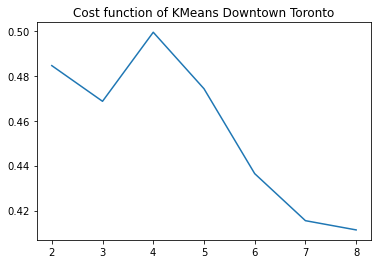

In [18]:
#droping the string category 
toronto_v_c = Toronto_dt_venues.drop(['Venue','Venue Category'], axis =1)
finding_best_k(toronto_v_c,8,'Downtown Toronto')

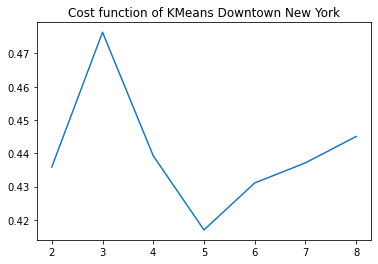

In [19]:
manhatten_v_c = NY_dt_venues.drop(['Venue','Venue Category'], axis =1)
finding_best_k(manhatten_v_c,8,'Downtown New York')

Applying Silhouette Coefficient to find the best K value for each of two cities based on geographical coordination distribution.The optimal value is at the peak Silhouette Score. 
* The best K is **4** for Downtown Toronto. 
* The best K is **3** for Downtown New York (Manhattan)

In [20]:
# fit the best K value for each city with Kmean and add the grouping labels back to the retrived data from Foursquare API 
clf1 = KMeans(n_clusters=4, random_state=10).fit(toronto_v_c)
Toronto_dt_venues.insert(4,'Cluster Labels',clf1.labels_)

clf2 = KMeans(n_clusters=3, random_state=10).fit(manhatten_v_c)
NY_dt_venues.insert(4,'Cluster Labels',clf2.labels_)

In [21]:
Toronto_dt_venues.head()

,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Labels
0,Downtown Toronto,43.653232,-79.385296,Neighborhood,2
1,Nathan Phillips Square,43.652270,-79.383516,Plaza,2
2,Four Seasons Centre for the Performing Arts,43.650592,-79.385806,Concert Hall,0
3,Indigo,43.653515,-79.380696,Bookstore,2
4,Richmond Station,43.651569,-79.379266,American Restaurant,2


In [22]:
NY_dt_venues.head()

,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Labels
0,Doughnut Plant,40.716303,-73.988579,Donut Shop,2
1,Regal Essex 14 & RPX,40.718133,-73.987895,Movie Theater,2
2,The Grand Delancey,40.718083,-73.987653,Beer Bar,2
3,Hawa Smoothies,40.714200,-73.989390,Juice Bar,2
4,La Contenta,40.718757,-73.987032,Mexican Restaurant,2


In [23]:
def plot_the_clustering_map(n_cluster,venues_infor,latitude,longitiude):
    map_clusters = folium.Map(location=[latitude, longitiude],zoom_start = 14,width = 500, height = 400)
    #color setting for each cluster
    x = np.arange(n_cluster)
    y = [i+ x + (i*x)**2 for i in range (n_cluster)]
    color_arr = cm.rainbow(np.linspace(0, 1, len(y)))
    rainbow = [colors.rgb2hex(i) for i in color_arr]
    
    for lat, lon, vc, cluster in zip(venues_infor['Venue Latitude'], venues_infor['Venue Longitude'], venues_infor['Venue Category'], venues_infor['Cluster Labels']):
        label = folium.Popup(str(vc) + ' Cluster ' + str(cluster), parse_html=True)
        folium.CircleMarker(
        [lat, lon],
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
    return map_clusters

In [24]:
toronto_map_cluster = plot_the_clustering_map(4, Toronto_dt_venues, Toronto_latitude, Toronto_longitude)
toronto_map_cluster

In [25]:
mahatten_map_cluster = plot_the_clustering_map(3, NY_dt_venues, NY_downtown_latitude, NY_downtown_longitude)
mahatten_map_cluster

## Result and discussion <a name = "results"></a>

Interestingly, the clustering made by KMeans in both cities venue points. They look similar as the possible number of clustering shown on the least favorite 5 business categories.

However, if we look closer to two city downtown KMean distribution map, each cluster contains food services, drinks, coffee shops, or restaurants. For high density of clusters, it is easy to see different food services types by crossing few blocks in the street.  This reflects those area has developed and became a specific commercial street.

## Conclusion <a name = "conclusion"></a>

From the distribution types of business categories, both cities have less favor in certain food services types and investors. Food services, there are foods that are not so popular for local people in both cities. However, it could be an opportunity for start-up business owners to improve their recipe but retain the uniqueness of food culture itself. Therefore, they can differentiate themselves with unique selling points to compete with local business. For investors, it mainly depends on the budget and risk assessment of the business that is evaluated by the business owner. It is not recommended for new start-up business owners to launch a big project even if budget is not an issue. The reason for that is the investment contains many uncertainties if the business owner is not familiar with relevant industry. 

Those suggestions just provide brief ideas about possible ways to launch businesses in the downtown area of Toronto and New York. Bias may apply since the data sample is not big enough. Additionally, there are some limitations to access specific data types. For an example, the operation of a restaurant (tips, operating hours, etc.) to have further investigation. However, for learning purposes on this project, this project achieved the application of KMeans and data visualization on a map.